# Definições

In [216]:
%matplotlib inline

import sys
import lumapi
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.constants import c


In [217]:
inter = lumapi.INTERCONNECT()

In [218]:
Comprimento_de_acoplamento = 14e-6
Comprimento_central = 7e-6

# Simulação 1

In [219]:
Lc = Comprimento_de_acoplamento

n1 = 2.4615
n2 = 2.4413
C = np.pi*(n1-n2)/(1550e-9)
kappa = np.abs(np.sin(C*Lc))
print(kappa)

kappa2 = np.sqrt(0.25*kappa**4)

print(kappa2)

L = np.arcsin(kappa2)/C
print(L)

0.542313825634811
0.14705214273733208
3.6047868915284547e-06


In [220]:
um = 1e-6
nm = 1e-9

# 1nm, 10nm, 20nm, 6.67nm
Lr = np.array([581.8559265358,  64.8959265,  27.69876823, 93.95592653])*um

Lc = 3.97*um
Lc1 = 9.93*um

raio = 5*um

comprimento_DC = 2*np.pi*raio + Lc + Lc1
comprimentos_guias_pdk = Lr - comprimento_DC

print(raio)
print(comprimento_DC)
print(comprimentos_guias_pdk/2)

4.9999999999999996e-06
4.531592653589793e-05
[ 2.68270000e-04  9.78999998e-06 -8.80857915e-06  2.43200000e-05]


In [221]:
indice = 1
FSR = [1, 10, 20, 6.67]

inter.switchtodesign()
inter.deleteall()

inter.addelement('Optical Network Analyzer')
inter.set("number of points",50000)
inter.set("number of input ports",2)
inter.set("input parameter",2)
inter.set("start frequency", c/(1500*nm))
inter.set("stop frequency", c/(1600*nm))

inter.expressioncheckoff()
inter.addelement("ebeam_dc_te1550")
inter.set("coupling_length", Lc)
inter.set("name", "DC1")

inter.select("DC1")
inter.copy()
inter.set("name","DC2")
inter.set("coupling_length", Lc1)
inter.rotateelement("DC1")
inter.rotateelement("DC1")

inter.addelement('ebeam_wg_integral_1550')
inter.set("name", "Guia_1")
inter.set("wg_length", comprimentos_guias_pdk[indice]/2)
inter.rotateelement("Guia_1")

inter.addelement('ebeam_wg_integral_1550')
inter.set("name", "Guia_2")
inter.set("wg_length", comprimentos_guias_pdk[indice]/2)
inter.rotateelement("Guia_2")

inter.setposition("ONA_1",-220,-270)
inter.setposition("DC1",0,175)
inter.setposition("DC2",0,175*3)
inter.setposition("Guia_1",220,175*2)
inter.setposition("Guia_2",-220,175*2)

In [222]:
inter.connect("DC1", "opt_3", "Guia_2", "port 1")
inter.connect("DC1", "opt_1", "Guia_1", "port 1")
inter.connect("Guia_1", "port 2", "DC2", "opt_3")
inter.connect("Guia_2", "port 2", "DC2", "opt_1")
inter.connect("ONA_1", "output", "DC2", "opt_2")
inter.connect("ONA_1", "input 1", "DC2", "opt_4")
inter.connect("ONA_1", "input 2", "DC1", "opt_4")  

1.0

In [223]:
inter.run()

In [224]:
TE_gain_1 = np.squeeze(inter.getresult("ONA_1","input 1/mode 1/gain")["'TE' gain (dB)"])
TE_gain_2 = np.squeeze(inter.getresult("ONA_1","input 2/mode 1/gain")["'TE' gain (dB)"])

FSR1 = inter.getresult("ONA_1","input 1/mode 1/peak/free spectral range")
fsr_wv1= np.squeeze(FSR1['wavelength'])
FSR1 = FSR1["'TE' free spectral range (m)"]

FSR2 = inter.getresult("ONA_1","input 2/mode 1/peak/free spectral range")
fsr_wv2= np.squeeze(FSR2['wavelength'])
FSR2 = FSR2["'TE' free spectral range (m)"]


comprimentos_de_onda1 = np.squeeze(inter.getresult("ONA_1","input 1/mode 1/gain")['wavelength'])
comprimentos_de_onda2 = np.squeeze(inter.getresult("ONA_1","input 2/mode 1/gain")['wavelength'])

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
C:\Users\gson5\AppData\Local\Temp\ipykernel_52100\3213006622.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Comprimento de Onda $(\mu m)$', fontsize = 16)


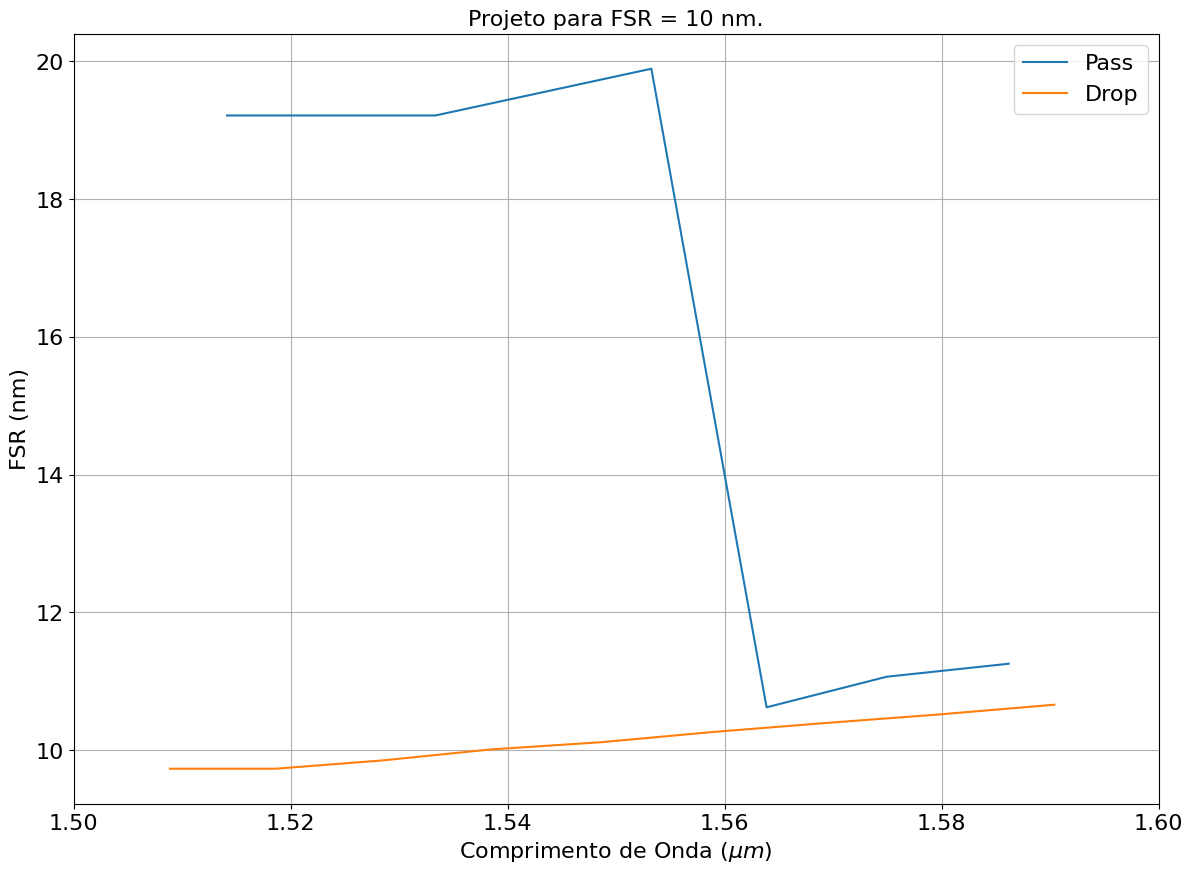

In [225]:
plt.figure(figsize=(14,10))

plt.plot(fsr_wv1*1e6,FSR1*1e9, label = "Pass")
plt.plot(fsr_wv2*1e6,FSR2*1e9, label = "Drop")

plt.xlabel('Comprimento de Onda $(\mu m)$', fontsize = 16)
plt.ylabel('FSR (nm)', fontsize = 16)
plt.title(f"Projeto para FSR = {FSR[indice]} nm.", fontsize = 16)

plt.tick_params(axis='both', labelsize=16)

plt.xlim(1.5,1.6)

plt.legend(loc = "best", fontsize = 16)

plt.grid(True)

plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
C:\Users\gson5\AppData\Local\Temp\ipykernel_52100\1815731862.py:9: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('Comprimento de Onda $(\mu m)$', fontsize = 16)


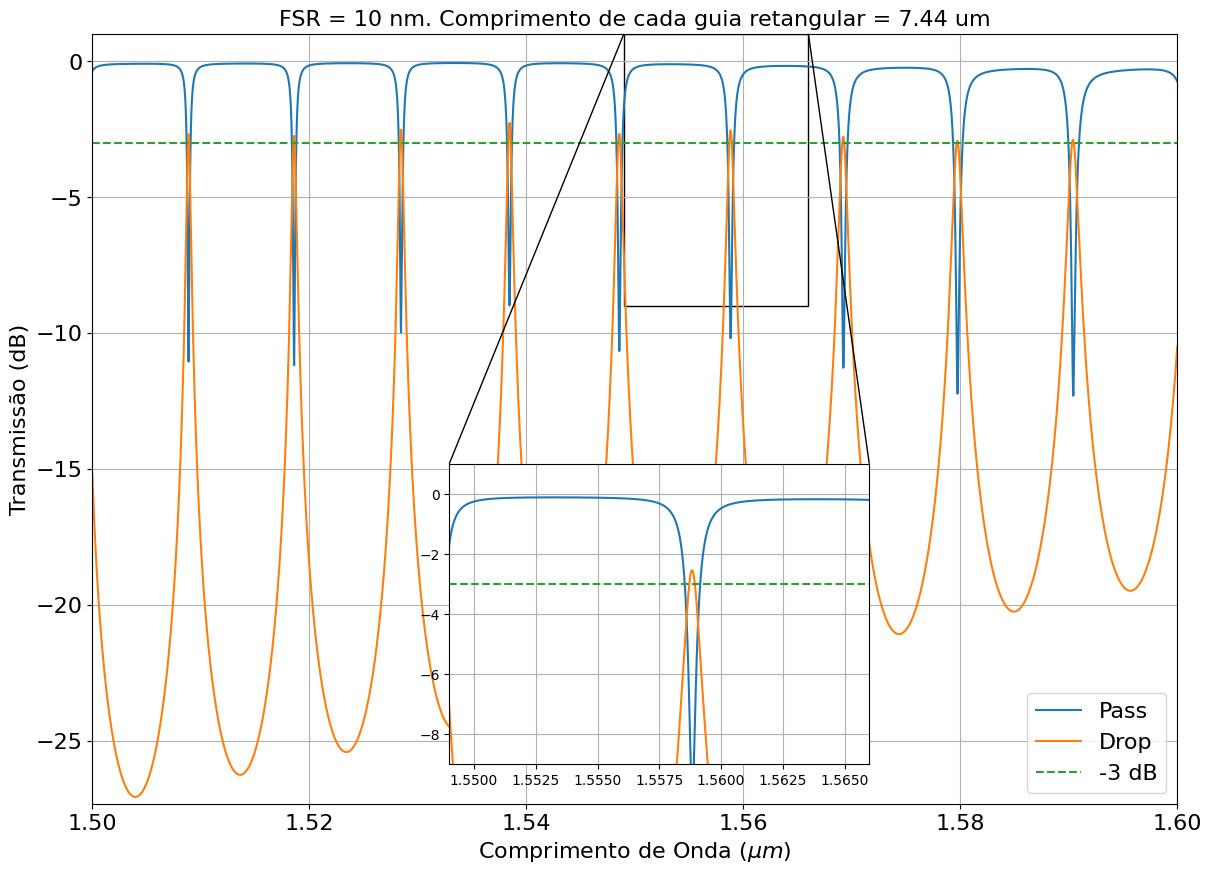

In [226]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(comprimentos_de_onda1*1e6,TE_gain_1, label = "Pass")
ax.plot(comprimentos_de_onda2*1e6,TE_gain_2, label = "Drop")
ax.set_xlabel('Comprimento de Onda $(\mu m)$', fontsize = 16)
ax.set_ylabel('Transmissão (dB)', fontsize = 16)
ax.set_title(f'FSR = {FSR[indice]} nm. Comprimento de cada guia retangular = 7.44 um', fontsize = 16)

ax.axhline(y=-3, linestyle='--', color = '#2ca02c', label = '-3 dB')

ax.tick_params(axis='both', labelsize=16)

ax.set_xlim(1.5,1.6)
ax.set_ylim(min(TE_gain_1) - 15 ,1)
ax.legend(loc = "best", fontsize = 16)
plt.grid(True)

zoom = plt.axes([0.38, 0.15, 0.3, 0.3])  # [x, y, largura, altura] em coordenadas relativas (0 a 1)
zoom.plot(comprimentos_de_onda1*1e6, TE_gain_1)
zoom.plot(comprimentos_de_onda2*1e6, TE_gain_2)
zoom.axhline(y=-3, linestyle='--', color = '#2ca02c', label = '-3 dB')
zoom.set_xlim(1.549, 1.566)  # Define a região de zoom no eixo x
zoom.set_ylim(-9, 1)  # Define a região de zoom no eixo y
# Ajusta a quantidade de divisões no grid do gráfico principal
zoom.xaxis.set_major_locator(MaxNLocator(8))  # No máximo 6 divisões no eixo x
zoom.yaxis.set_major_locator(MaxNLocator(6))  # No máximo 6 divisões no eixo y
mark_inset(ax, zoom, loc1=1, loc2=2, fc="none", ec="black")
plt.grid(True)

plt.show()


# Simulação 2

In [227]:
um = 1e-6
nm = 1e-9

# 1nm, 10nm, 20nm, 6.67nm
Lr = np.array([581.8559265358,  64.8959265,  27.69876823, 93.95592653])*um

Lc = 3.97*um
Lc1 = 14.58*um

raio = 5*um

comprimento_DC = 2*np.pi*raio + Lc + Lc1
comprimentos_guias_pdk = Lr - comprimento_DC

print(raio)
print(comprimento_DC)
print(comprimentos_guias_pdk/2)

4.9999999999999996e-06
4.9965926535897925e-05
[ 2.65945000e-04  7.46499998e-06 -1.11335792e-05  2.19950000e-05]


In [228]:
indice_2 = 3
FSR = [1, 10, 20, 6.67]

inter.switchtodesign()
inter.deleteall()

inter.addelement('Optical Network Analyzer')
inter.set("number of points",50000)
inter.set("number of input ports",2)
inter.set("input parameter",2)
inter.set("start frequency", c/(1500*nm))
inter.set("stop frequency", c/(1600*nm))

inter.expressioncheckoff()
inter.addelement("ebeam_dc_te1550")
inter.set("coupling_length", Lc)
inter.set("name", "DC1")

inter.select("DC1")
inter.copy()
inter.set("name","DC2")
inter.set("coupling_length", Lc1)
inter.rotateelement("DC1")
inter.rotateelement("DC1")

inter.addelement('ebeam_wg_integral_1550')
inter.set("name", "Guia_1")
inter.set("wg_length", comprimentos_guias_pdk[indice_2]/2)
inter.rotateelement("Guia_1")

inter.addelement('ebeam_wg_integral_1550')
inter.set("name", "Guia_2")
inter.set("wg_length", comprimentos_guias_pdk[indice_2]/2)
inter.rotateelement("Guia_2")

inter.setposition("ONA_1",-220,-270)
inter.setposition("DC1",0,175)
inter.setposition("DC2",0,175*3)
inter.setposition("Guia_1",220,175*2)
inter.setposition("Guia_2",-220,175*2)

In [229]:
inter.connect("DC1", "opt_3", "Guia_2", "port 1")
inter.connect("DC1", "opt_1", "Guia_1", "port 1")
inter.connect("Guia_1", "port 2", "DC2", "opt_3")
inter.connect("Guia_2", "port 2", "DC2", "opt_1")
inter.connect("ONA_1", "output", "DC2", "opt_2")
inter.connect("ONA_1", "input 1", "DC2", "opt_4")
inter.connect("ONA_1", "input 2", "DC1", "opt_4")  

1.0

In [230]:
inter.run()

In [231]:
TE_gain_3 = np.squeeze(inter.getresult("ONA_1","input 1/mode 1/gain")["'TE' gain (dB)"])
TE_gain_4 = np.squeeze(inter.getresult("ONA_1","input 2/mode 1/gain")["'TE' gain (dB)"])

FSR3 = inter.getresult("ONA_1","input 1/mode 1/peak/free spectral range")
fsr_wv3= np.squeeze(FSR3['wavelength'])
FSR3 = FSR3["'TE' free spectral range (m)"]

FSR4= inter.getresult("ONA_1","input 2/mode 1/peak/free spectral range")
fsr_wv4= np.squeeze(FSR4['wavelength'])
FSR4 = FSR4["'TE' free spectral range (m)"]


comprimentos_de_onda3 = np.squeeze(inter.getresult("ONA_1","input 1/mode 1/gain")['wavelength'])
comprimentos_de_onda4 = np.squeeze(inter.getresult("ONA_1","input 2/mode 1/gain")['wavelength'])

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
C:\Users\gson5\AppData\Local\Temp\ipykernel_52100\3616310859.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Comprimento de Onda $(\mu m)$', fontsize = 16)


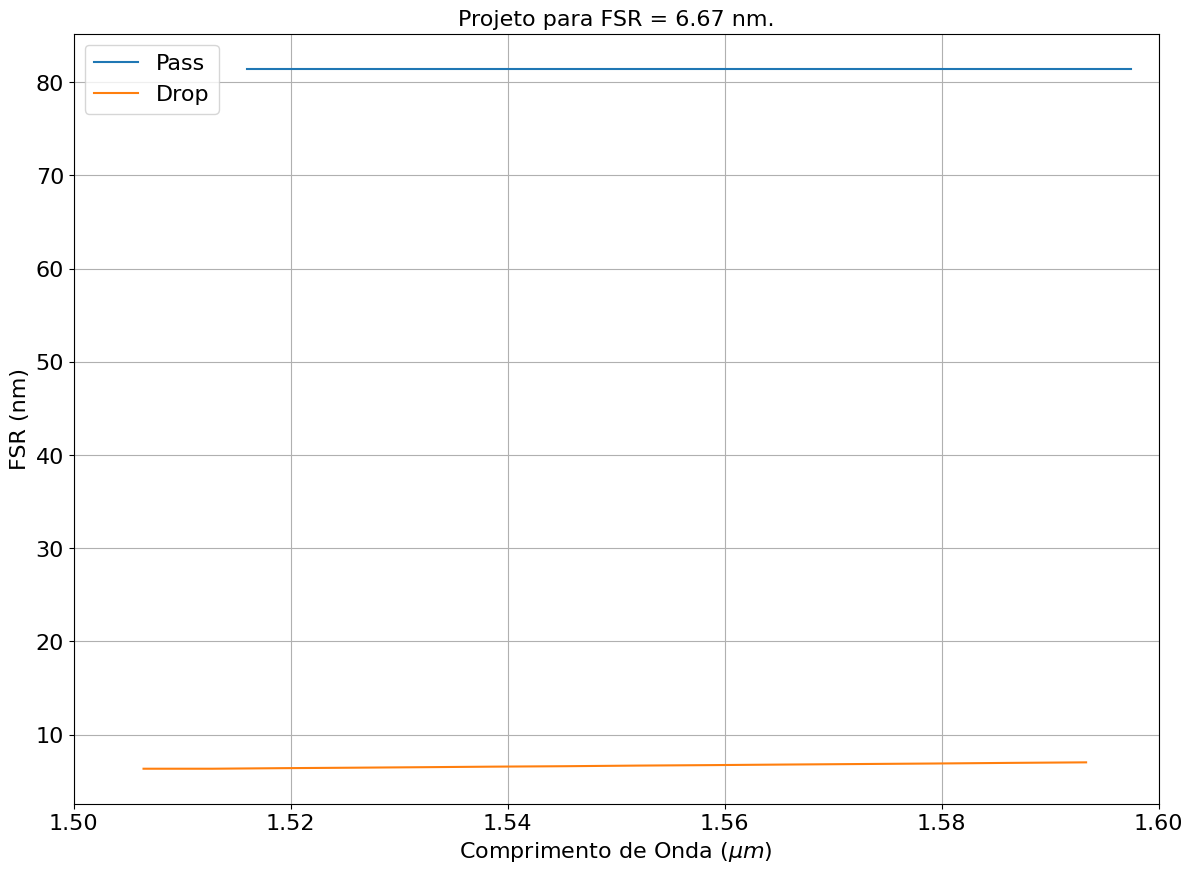

In [232]:
plt.figure(figsize=(14,10))

plt.plot(fsr_wv3*1e6,FSR3*1e9, label = "Pass")
plt.plot(fsr_wv4*1e6,FSR4*1e9, label = "Drop")

plt.xlabel('Comprimento de Onda $(\mu m)$', fontsize = 16)
plt.ylabel('FSR (nm)', fontsize = 16)
plt.title(f"Projeto para FSR = {FSR[indice_2]} nm.", fontsize = 16)

plt.tick_params(axis='both', labelsize=16)

plt.xlim(1.5,1.6)

plt.legend(loc = "best", fontsize = 16)

plt.grid(True)

plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
C:\Users\gson5\AppData\Local\Temp\ipykernel_52100\697405858.py:9: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('Comprimento de Onda $(\mu m)$', fontsize = 16)


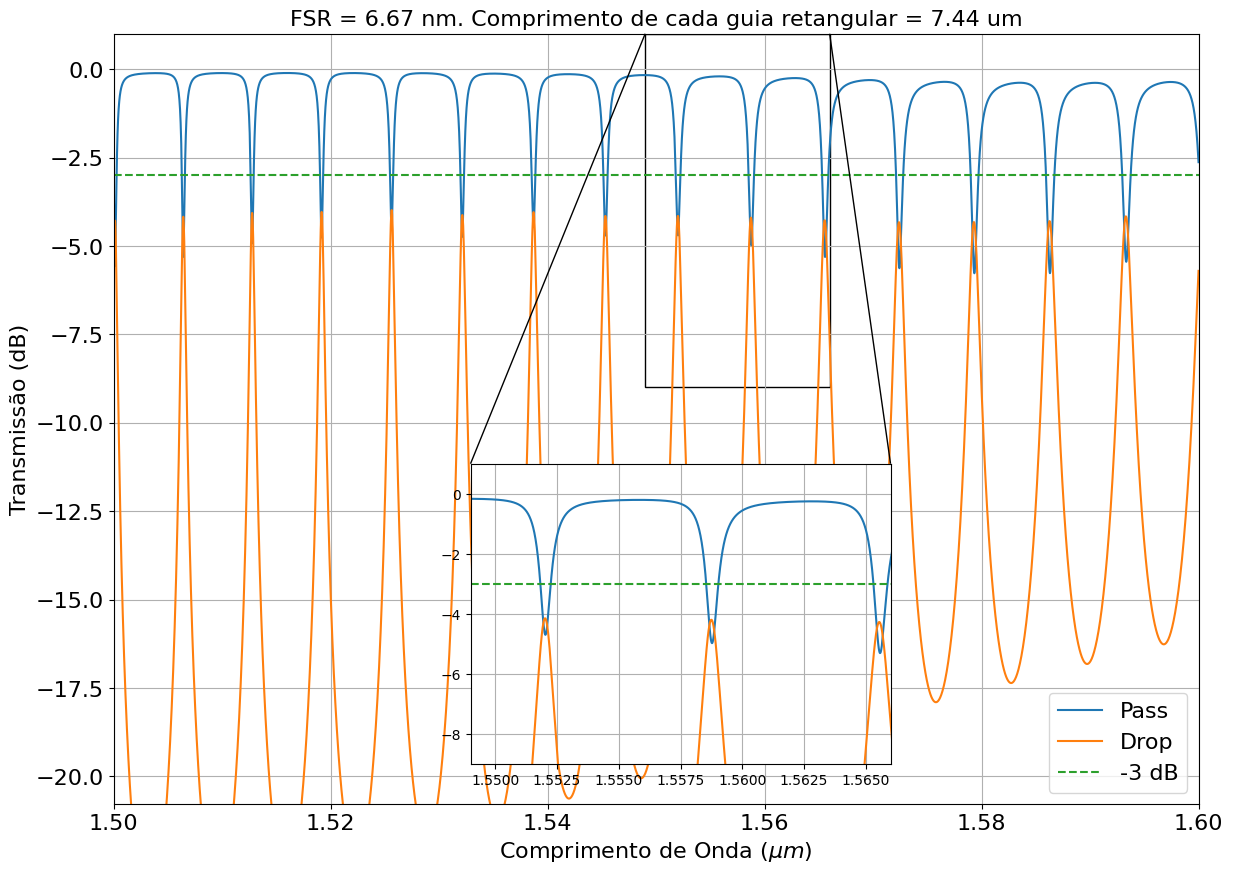

In [233]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(comprimentos_de_onda3*1e6,TE_gain_3, label = "Pass")
ax.plot(comprimentos_de_onda4*1e6,TE_gain_4, label = "Drop")
ax.set_xlabel('Comprimento de Onda $(\mu m)$', fontsize = 16)
ax.set_ylabel('Transmissão (dB)', fontsize = 16)
ax.set_title(f'FSR = {FSR[indice_2]} nm. Comprimento de cada guia retangular = 7.44 um', fontsize = 16)

ax.axhline(y=-3, linestyle='--', color = '#2ca02c', label = '-3 dB')

ax.tick_params(axis='both', labelsize=16)

ax.set_xlim(1.5,1.6)
ax.set_ylim(min(TE_gain_3) - 15 ,1)
ax.legend(loc = "best", fontsize = 16)
plt.grid(True)

zoom = plt.axes([0.38, 0.15, 0.3, 0.3])  # [x, y, largura, altura] em coordenadas relativas (0 a 1)
zoom.plot(comprimentos_de_onda3*1e6, TE_gain_3)
zoom.plot(comprimentos_de_onda4*1e6, TE_gain_4)
zoom.axhline(y=-3, linestyle='--', color = '#2ca02c', label = '-3 dB')
zoom.set_xlim(1.549, 1.566)  # Define a região de zoom no eixo x
zoom.set_ylim(-9, 1)  # Define a região de zoom no eixo y
# Ajusta a quantidade de divisões no grid do gráfico principal
zoom.xaxis.set_major_locator(MaxNLocator(8))  # No máximo 6 divisões no eixo x
zoom.yaxis.set_major_locator(MaxNLocator(6))  # No máximo 6 divisões no eixo y
mark_inset(ax, zoom, loc1=1, loc2=2, fc="none", ec="black")
plt.grid(True)

plt.show()


# Sobreposição de Curvas

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
C:\Users\gson5\AppData\Local\Temp\ipykernel_52100\1889190539.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Comprimento de Onda $(\mu m)$', fontsize = 16)
C:\Users\gson5\AppData\Local\Temp\ipykernel_52100\1889190539.py:25: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Comprimento de Onda $(\mu m)$', fontsize = 16)


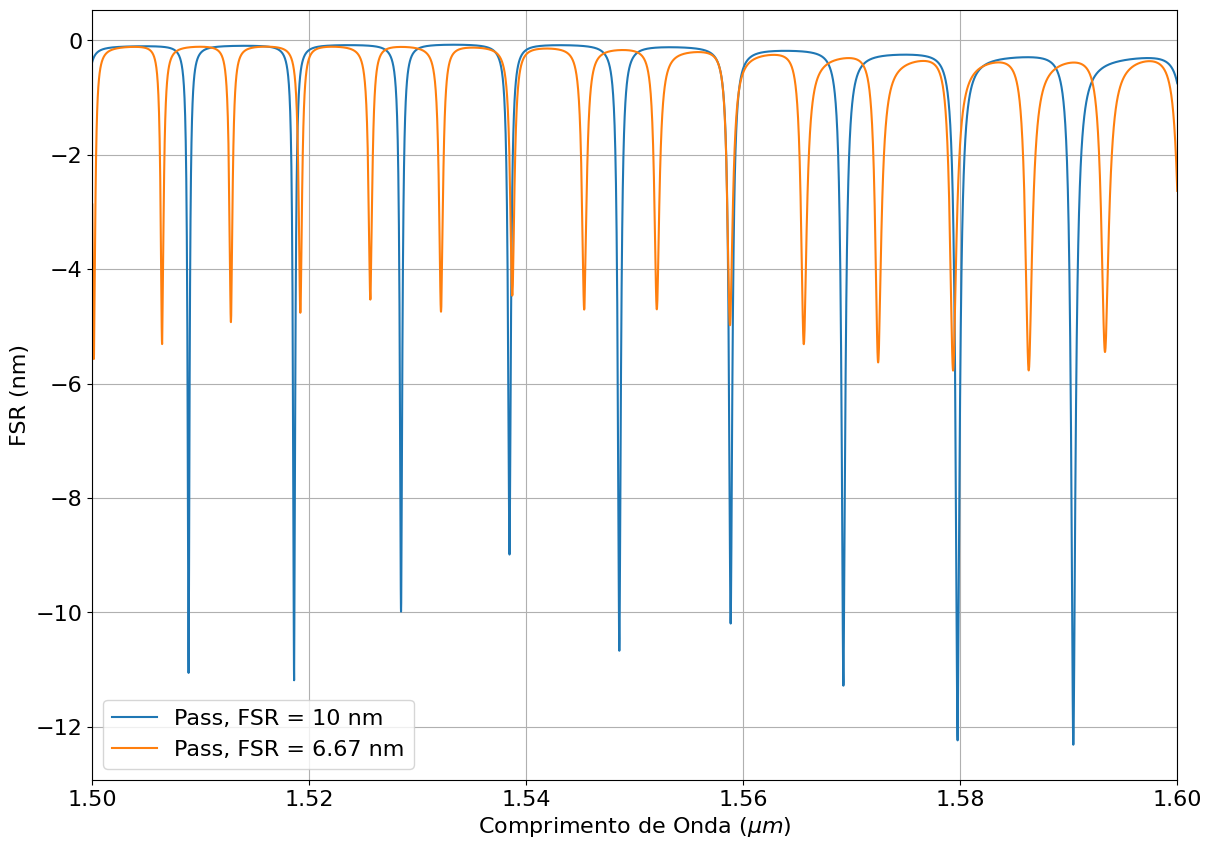

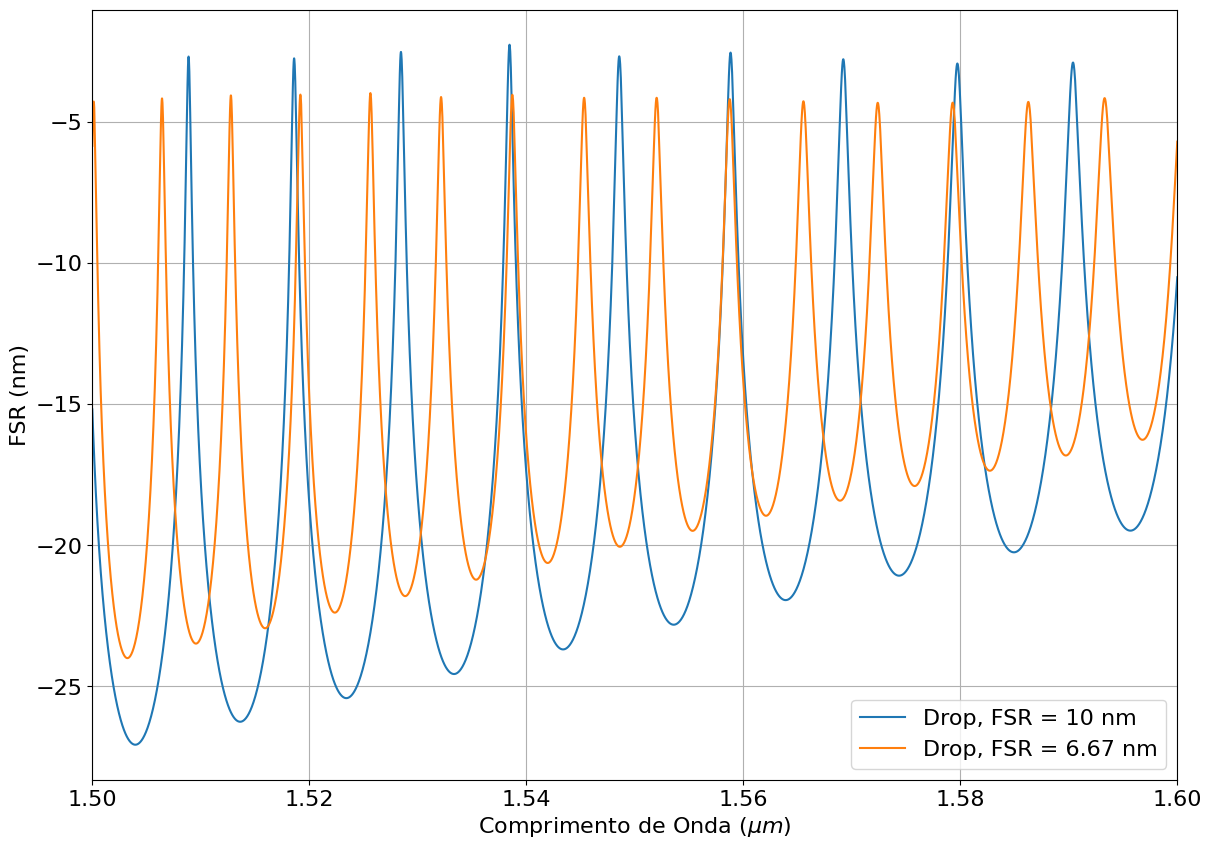

In [234]:
plt.figure(figsize=(14,10))

plt.plot(comprimentos_de_onda1*1e6,TE_gain_1, label = f"Pass, FSR = {FSR[indice]} nm")
plt.plot(comprimentos_de_onda1*1e6,TE_gain_3, label = f"Pass, FSR = {FSR[indice_2]} nm")

plt.xlabel('Comprimento de Onda $(\mu m)$', fontsize = 16)
plt.ylabel('FSR (nm)', fontsize = 16)

plt.tick_params(axis='both', labelsize=16)

plt.xlim(1.5,1.6)
ax.set_ylim(min(TE_gain_3) - 15 ,1)

plt.legend(loc = "best", fontsize = 16)

plt.grid(True)

plt.show()

plt.figure(figsize=(14,10))

plt.plot(comprimentos_de_onda1*1e6,TE_gain_2, label = f"Drop, FSR = {FSR[indice]} nm")
plt.plot(comprimentos_de_onda1*1e6,TE_gain_4, label = f"Drop, FSR = {FSR[indice_2]} nm")

plt.xlabel('Comprimento de Onda $(\mu m)$', fontsize = 16)
plt.ylabel('FSR (nm)', fontsize = 16)

plt.tick_params(axis='both', labelsize=16)

plt.xlim(1.5,1.6)
ax.set_ylim(min(TE_gain_3) - 15 ,1)

plt.legend(loc = "best", fontsize = 16)

plt.grid(True)

plt.show()

# Simulação 3

In [261]:
Comprimento_central = 3.97e-6

Lc_superior = [9.93e-6]
Lc_inferior = 14.37e-6
L_adicional_superior = 0
L_adicional_inferior = 0

TE_gain_1 = []
TE_gain_2 = []
FSR1 =[]
FSR2 =[]
fsr_wv1 =[]
fsr_wv2 = []
comprimentos_de_onda1 = []
comprimentos_de_onda2 = []

for i in range(len(Lc_superior)):

    print(Lc_superior[i]*1e6, " um")

    Lc1 = Comprimento_central
    raio = 5*um

    comprimento_DC_1 = 2*np.pi*raio + Lc_superior[i] + Lc1
    comprimento_DC_2 = 2*np.pi*raio + Lc_inferior + Lc1
    comprimentos_guias_pdk_superior = Lr - comprimento_DC_1
    comprimentos_guias_pdk_inferior = Lr - comprimento_DC_2
    # print(raio)
    # print(comprimento_DC)
    # print(comprimentos_guias_pdk/2)

    inter.switchtodesign()
    inter.deleteall()

    inter.addelement('Optical Network Analyzer')
    inter.set("number of points",50000)
    inter.set("number of input ports",2)
    inter.set("input parameter",2)
    inter.set("start frequency", c/(1500*nm))
    inter.set("stop frequency", c/(1600*nm))

    inter.expressioncheckoff()

    inter.addelement("ebeam_dc_te1550")
    inter.set("name", "DC1")

    inter.select("DC1")
    inter.copy()
    inter.set("name","DC2")
    inter.set("coupling_length", Lc_inferior)

    inter.rotateelement("DC1")
    inter.rotateelement("DC1")

    inter.select("DC1")
    inter.copy()
    inter.set("name","DC4")
    inter.set("coupling_length", Lc_superior[i])

    inter.select("DC1")
    inter.set("coupling_length",Lc1)

    inter.addelement('ebeam_wg_integral_1550')
    inter.set("name", "Guia_1")
    inter.set("wg_length", comprimentos_guias_pdk_inferior[1]/2 + L_adicional_inferior)
    inter.rotateelement("Guia_1")

    inter.addelement('ebeam_wg_integral_1550')
    inter.set("name", "Guia_2")
    inter.set("wg_length", comprimentos_guias_pdk_inferior[1]/2 + L_adicional_inferior)
    inter.rotateelement("Guia_2")

    inter.addelement('ebeam_wg_integral_1550')
    inter.set("name", "Guia_3")
    inter.set("wg_length", comprimentos_guias_pdk_superior[3]/2 + L_adicional_superior)
    inter.rotateelement("Guia_3")

    inter.addelement('ebeam_wg_integral_1550')
    inter.set("name", "Guia_4")
    inter.set("wg_length", comprimentos_guias_pdk_superior[3]/2 + L_adicional_superior)
    inter.rotateelement("Guia_4")

    inter.setposition("DC4", 0, -175)
    inter.setposition("Guia_3", 220, -75)
    inter.setposition("Guia_4", -220, -75)
    inter.setposition("ONA_1",-220,-270)
    inter.setposition("DC1",0,175)
    inter.setposition("DC2",0,175*3)
    inter.setposition("Guia_1",220,175*2)
    inter.setposition("Guia_2",-220,175*2)
    
    inter.connect("DC1", "opt_3", "Guia_2", "port 1")
    inter.connect("DC1", "opt_1", "Guia_1", "port 1")
    inter.connect("Guia_1", "port 2", "DC2", "opt_3")
    inter.connect("Guia_2", "port 2", "DC2", "opt_1")
    inter.connect("DC1", "opt_4", "Guia_4", "port 2")
    inter.connect("DC1", "opt_2", "Guia_3", "port 2")
    inter.connect("DC4", "opt_1", "Guia_3", "port 1")
    inter.connect("DC4", "opt_3", "Guia_4", "port 1")

    inter.connect("ONA_1", "output", "DC2", "opt_2")
    inter.connect("ONA_1", "input 1", "DC2", "opt_4")
    inter.connect("ONA_1", "input 2", "DC4", "opt_2")

    inter.run()
    
    TE_gain_1.append(np.squeeze(inter.getresult("ONA_1","input 1/mode 1/gain")["'TE' gain (dB)"]))
    TE_gain_2.append(np.squeeze(inter.getresult("ONA_1","input 2/mode 1/gain")["'TE' gain (dB)"]))

    FSR1_aux = inter.getresult("ONA_1","input 1/mode 1/peak/free spectral range")
    fsr_wv1.append(np.squeeze(FSR1_aux['wavelength']))
    FSR1.append(FSR1_aux["'TE' free spectral range (m)"])

    FSR2_aux =inter.getresult("ONA_1","input 2/mode 1/peak/free spectral range")
    fsr_wv2.append(np.squeeze(FSR2_aux['wavelength']))
    FSR2.append(FSR2_aux["'TE' free spectral range (m)"])

    comprimentos_de_onda1 = np.squeeze(inter.getresult("ONA_1","input 1/mode 1/gain")['wavelength'])
    comprimentos_de_onda2 = np.squeeze(inter.getresult("ONA_1","input 2/mode 1/gain")['wavelength'])

9.93  um


<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
C:\Users\gson5\AppData\Local\Temp\ipykernel_52100\2887208284.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Comprimento de Onda $(\mu m)$', fontsize = 16)


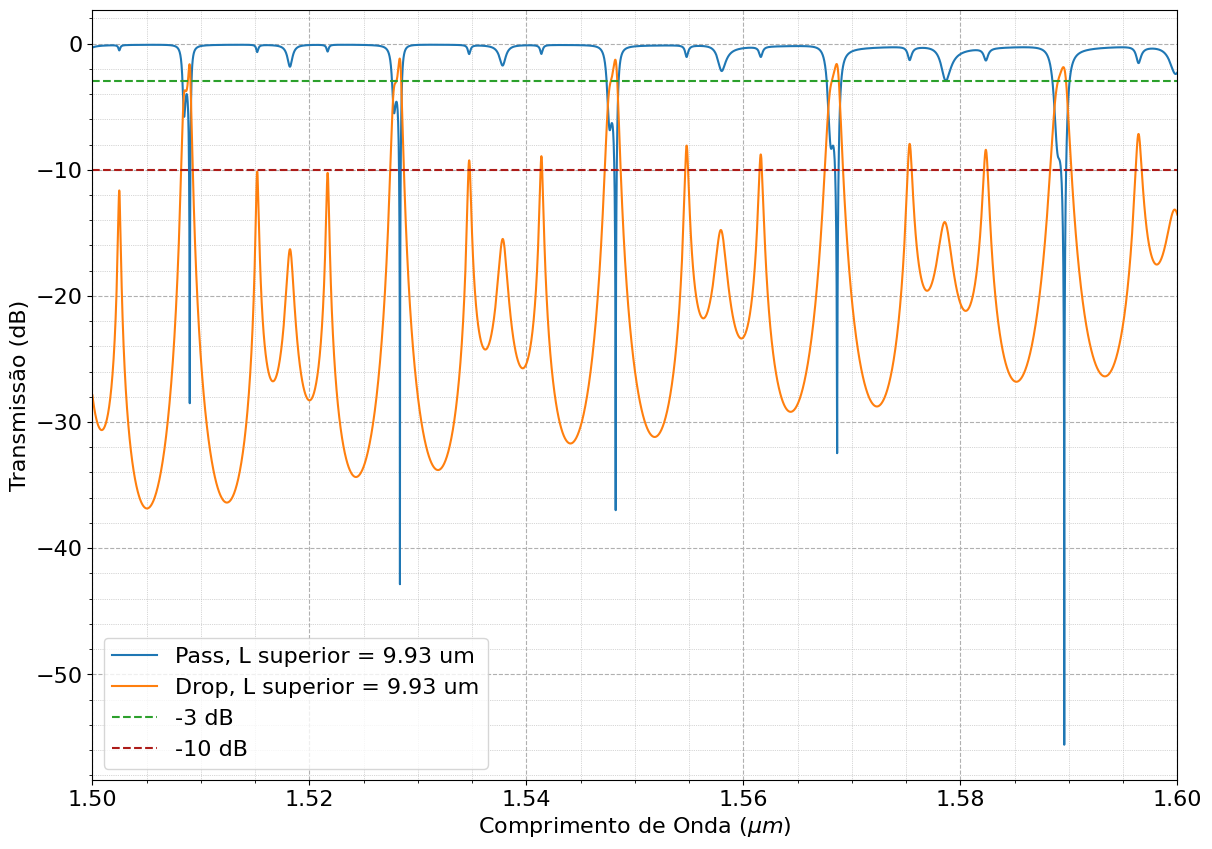

In [262]:
for i in range(len(Lc_superior)):
    plt.figure(figsize=(14,10))

    plt.plot(comprimentos_de_onda1*1e6,TE_gain_1[i], label = f"Pass, L superior = {Lc_superior[i]*1e6:.2f} um")
    plt.plot(comprimentos_de_onda2*1e6,TE_gain_2[i], label = f"Drop, L superior = {Lc_superior[i]*1e6:.2f} um")
    plt.xlabel('Comprimento de Onda $(\mu m)$', fontsize = 16)
    plt.ylabel('Transmissão (dB)', fontsize = 16)
    plt.tick_params(axis='both', labelsize=16)
    plt.axhline(y=-3, linestyle='--', color = '#2ca02c', label = '-3 dB')
    plt.axhline(y=-10, linestyle='--', color = '#ad1c19', label = '-10 dB')

    plt.grid(True, which='major', linestyle='--', linewidth=0.8)  # Grade principal
    plt.minorticks_on()  # Ativa as grades menores
    plt.grid(True, which='minor', linestyle=':', linewidth=0.5)  # Grade secundária
    
    plt.xlim(1.5,1.6)
    plt.legend(loc = "best", fontsize = 16)

    plt.grid(True)

    #plt.savefig(f'C:/Users/gson5/Downloads/Photonics-API-lumapi/LAB. 11 - RING/RESULTADOS/FSR 1 nm PDK.png')
    plt.show()